In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly import tools
#from plotly.subplot import make_subplots
from plotly.offline import iplot, init_notebook_mode
import warnings
warnings.filterwarnings("ignore")


 #### Loading data

In [26]:
df = pd.read_csv("FT1000.csv")
df.columns = df.columns.str.replace('[*]', '')
df.head()

Rank         Name in 2021 ranking in 2020 ranking    Country  \
0     1      Swappie              No              No    Finland   
1     2  Kilo Health              No              No  Lithuania   
2     3          OCI              No              No         UK   
3     4     OnlyFans              No              No         UK   
4     5        Enpal              No              No    Germany   

               Sector Absolute Growth Rate %  \
0          Technology              19,152.82   
1              Health              16,541.73   
2  Financial Services              13,133.13   
3          Technology              11,928.05   
4              Energy              11,441.27   

   Compound Annual Growth Rate (CAGR) % Revenue 2020 (€) Revenue 2017 (€)  \
0                                477.43       97,611,814          507,000   
1                                450.05       57,318,766          344,428   
2                                409.59      568,322,073        4,325,512   
3                                393.63      316,732,986        2,652,185   
4                                386.88       56,109,613          486,165   

   Number of employees 2020  Number of employees 2017  Founding Year  
0                     218.0                       1.0           2016  
1                     177.0                      10.0           2013  
2                      32.0                       4.0           2012  
3                     800.0                       4.0           2016  
4                     365.0                       9.0           2017

In [27]:
df.shape

(1000, 13)

In [28]:
df.columns

Index(['Rank', 'Name', 'in 2021 ranking', 'in 2020 ranking', 'Country',
       'Sector', 'Absolute Growth Rate %',
       'Compound Annual Growth Rate (CAGR) %', 'Revenue 2020 (€)',
       'Revenue 2017 (€)', 'Number of employees 2020',
       'Number of employees 2017', 'Founding Year'],
      dtype='object')

In [29]:
df.duplicated().sum()

0

In [154]:
df.isnull().sum()

Rank             0
Name             0
ranking2021      0
ranking2020      0
Country          0
Sector           0
AGR              0
CAGR             0
Revenue2020      0
Revenue2017      0
employees2020    0
employees2017    0
FoundingYear     0
rankcompare      0
rev_diff         0
emp_diff         0
dtype: int64

In [31]:
#df[df.columns[df.isnull().any()]].isnull().sum() # For getting Columns with count

In [32]:

#df['Number of employees 2020'] = df['Number of employees 2020'].replace(r'n/a','0', regex=True) 
#df['Number of employees 2017'] = df['Number of employees 2017'].replace(r'n/a','0', regex=True) 


#### Filling out the rows with 0 which has NaN value

In [33]:
df.fillna(0,inplace=True)

In [34]:
df.iloc[199] #checking 


Rank                                                                        200
Name                                    Lyonnaise de Construction et Renovation
in 2021 ranking                                                              No
in 2020 ranking                                                              No
Country                                                                  France
Sector                                                             Construction
Absolute Growth Rate %                                                   717.46
Compound Annual Growth Rate (CAGR) %                                     101.44
Revenue 2020 (€)                                                      6,640,842
Revenue 2017 (€)                                                        812,371
Number of employees 2020                                                      0
Number of employees 2017                                                      0
Founding Year                           

In [35]:
df.describe()

Rank  Compound Annual Growth Rate (CAGR) %  \
count  1000.000000                           1000.000000   
mean    500.500000                             78.881950   
std     288.819436                             52.471399   
min       1.000000                             36.550000   
25%     250.750000                             46.582500   
50%     500.500000                             61.105000   
75%     750.250000                             93.522500   
max    1000.000000                            477.430000   

       Number of employees 2020  Number of employees 2017  Founding Year  
count               1000.000000               1000.000000    1000.000000  
mean                  79.828000                 26.430000    2011.285000  
std                  161.496426                 63.543063       7.671677  
min                    0.000000                  0.000000    1898.000000  
25%                   14.000000                  4.000000    2010.000000  
50%                   30.000000                 10.000000    2013.000000  
75%                   70.000000                 23.000000    2015.000000  
max                 1798.000000                767.000000    2021.000000

In [36]:
df.nunique()

Rank                                    1000
Name                                    1000
in 2021 ranking                            2
in 2020 ranking                            2
Country                                   30
Sector                                    39
Absolute Growth Rate %                   994
Compound Annual Growth Rate (CAGR) %     931
Revenue 2020 (€)                         999
Revenue 2017 (€)                         999
Number of employees 2020                 226
Number of employees 2017                 122
Founding Year                             43
dtype: int64

In [37]:
df.rename(columns={'in 2021 ranking': 'ranking2021','in 2020 ranking': 'ranking2020',
                   'Absolute Growth Rate %':'AGR',
                   'Compound Annual Growth Rate (CAGR) %':'CAGR',
                   'Revenue 2020 (€)':'Revenue2020',
                   'Revenue 2017 (€)':'Revenue2017',
                   'Number of employees 2020':'employees2020',
                   'Number of employees 2017':'employees2017',
                   'Founding Year':'FoundingYear'},
                   inplace= True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           1000 non-null   int64  
 1   Name           1000 non-null   object 
 2   ranking2021    1000 non-null   object 
 3   ranking2020    1000 non-null   object 
 4   Country        1000 non-null   object 
 5   Sector         1000 non-null   object 
 6   AGR            1000 non-null   object 
 7   CAGR           1000 non-null   float64
 8   Revenue2020    1000 non-null   object 
 9   Revenue2017    1000 non-null   object 
 10  employees2020  1000 non-null   float64
 11  employees2017  1000 non-null   float64
 12  FoundingYear   1000 non-null   int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 101.7+ KB


In [39]:
df['employees2017'].unique()

array([  1.,  10.,   4.,   9.,   2.,  12.,  15.,   5.,  13.,  36.,   6.,
        23.,   8.,  20.,  72.,   3.,  90.,  21.,   7.,  22.,  16.,   0.,
        26.,  24.,  14.,  28.,  98.,  47.,  45.,  40., 106.,  18.,  33.,
        19.,  44.,  55.,  75.,  48., 399.,  32.,  17.,  37.,  31.,  30.,
        84.,  38., 767., 350.,  25., 109., 204.,  52.,  68., 271.,  74.,
        92., 156.,  56., 119.,  39.,  70.,  43.,  27., 172.,  35.,  60.,
        62.,  42.,  65., 744.,  29.,  50., 288., 266., 120.,  71.,  51.,
        11., 205.,  61., 199., 128., 242., 187., 185.,  80.,  82., 103.,
        53.,  41.,  57., 132., 230.,  34.,  46., 219., 150., 211., 634.,
       104., 257., 407.,  89.,  64.,  54., 140., 650., 133., 112., 117.,
       135., 190., 419.,  88.,  49., 105., 142., 330.,  63., 500., 431.,
       100.])

In [40]:
df.replace(',','', regex=True, inplace=True)
#df = df.apply(lambda x: x.str.replace(',', ''))
#df[['one', 'two', 'three']] = df[['one', 'two', 'three']].astype(str)

In [42]:
df['AGR'] = df['AGR'].astype(float)
df['Revenue2020'] = df['Revenue2020'].astype(float)
df['Revenue2017'] = df['Revenue2017'].astype(float)
df['employees2017'] = df['employees2017'].astype(float)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           1000 non-null   int64  
 1   Name           1000 non-null   object 
 2   ranking2021    1000 non-null   object 
 3   ranking2020    1000 non-null   object 
 4   Country        1000 non-null   object 
 5   Sector         1000 non-null   object 
 6   AGR            1000 non-null   float64
 7   CAGR           1000 non-null   float64
 8   Revenue2020    1000 non-null   float64
 9   Revenue2017    1000 non-null   float64
 10  employees2020  1000 non-null   float64
 11  employees2017  1000 non-null   float64
 12  FoundingYear   1000 non-null   int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 101.7+ KB


In [45]:
df["ranking2021"].unique()
df["ranking2021"].value_counts()

No     694
Yes    306
Name: ranking2021, dtype: int64

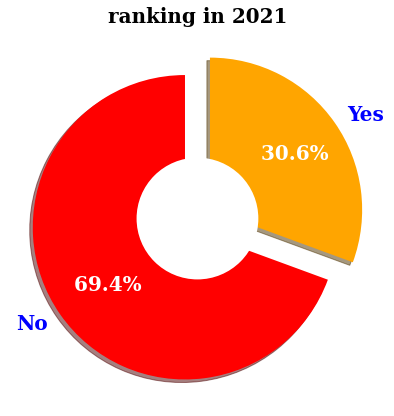

In [47]:
lbl_data=df["ranking2021"].value_counts()
explode = (0.1,0.1)
plt.figure(figsize =(10, 7))
patches, texts, pcts= plt.pie(lbl_data,
                                  autopct =' %1.1f%%',
                                  explode = explode,
                                  labels = lbl_data.index,
                                  shadow = True,
                                  colors = ['red','orange'],
                                  startangle = 90,
                                  pctdistance = 0.65,
                                  textprops = {'fontsize':20,
                                      'color':'blue',
                                     'weight':'bold',
                                     'family': 'serif'})
plt.setp(pcts, color = 'white')
hfont= {'fontname':'serif', 'weight':'bold'}
plt.title('ranking in 2021', size = 20, **hfont)

circle = plt.Circle((0,0),0.40, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.show()

In [48]:
df["ranking2020"].value_counts()

No     852
Yes    148
Name: ranking2020, dtype: int64

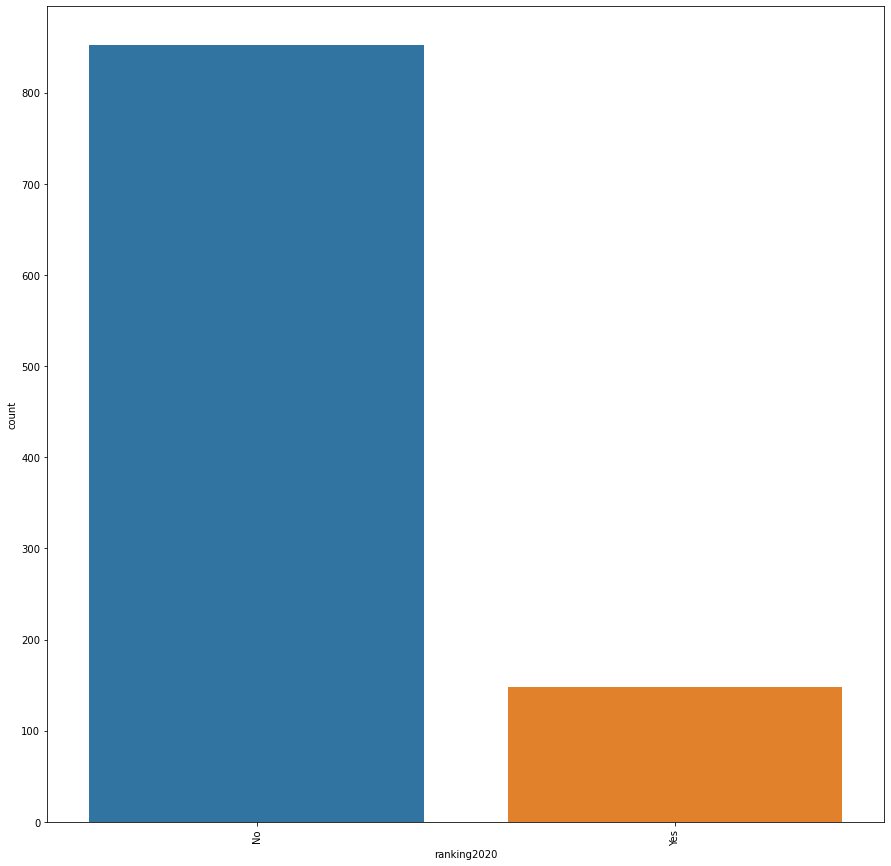

In [49]:
plt.figure(figsize=(15,15))
sns.countplot(x = df["ranking2020"])
plt.xticks(rotation = 90)
plt.show()

**There are 148 companies that also appeared in the ranking of 2020**

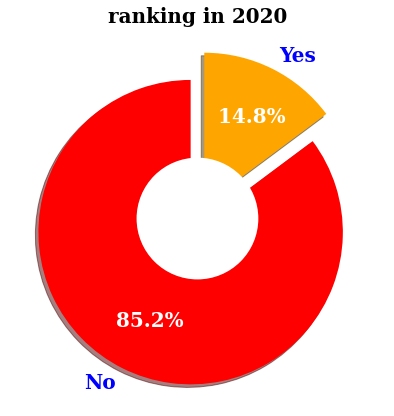

In [50]:
lbl_data=df["ranking2020"].value_counts()
explode = (0.1,0.1)
plt.figure(figsize =(10, 7))
patches, texts, pcts= plt.pie(lbl_data,
                                  autopct =' %1.1f%%',
                                  explode = explode,
                                  labels = lbl_data.index,
                                  shadow = True,
                                  colors = ['red','orange'],
                                  startangle = 90,
                                  pctdistance = 0.65,
                                  textprops = {'fontsize':20,
                                      'color':'blue',
                                     'weight':'bold',
                                     'family': 'serif'})
plt.setp(pcts, color = 'white')
hfont= {'fontname':'serif', 'weight':'bold'}
plt.title('ranking in 2020', size = 20, **hfont)

circle = plt.Circle((0,0),0.40, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(circle)
plt.show()

#### Comparing the both Ranking of 2021 and 2022 to find out the consistancy in their growth curve and adding a new column rankcompare

In [51]:
df['rankcompare'] = df.apply(lambda x: x['ranking2021'] if x['ranking2021'] <=
                     x['ranking2020'] and x['ranking2021']
                     else 'No', axis=1)

In [52]:
df


Rank            Name ranking2021 ranking2020    Country  \
0       1         Swappie          No          No    Finland   
1       2     Kilo Health          No          No  Lithuania   
2       3             OCI          No          No         UK   
3       4        OnlyFans          No          No         UK   
4       5           Enpal          No          No    Germany   
..    ...             ...         ...         ...        ...   
995   996  peopleForecast          No          No    Germany   
996   997       Digitalpa          No          No      Italy   
997   998    Faktenkontor          No          No    Germany   
998   999          CLAREO         Yes         Yes     France   
999  1000      Laca Trade         Yes         Yes      Italy   

                    Sector       AGR    CAGR  Revenue2020  Revenue2017  \
0               Technology  19152.82  477.43   97611814.0     507000.0   
1                   Health  16541.73  450.05   57318766.0     344428.0   
2       Financial Services  13133.13  409.59  568322073.0    4325512.0   
3               Technology  11928.05  393.63  316732986.0    2652185.0   
4                   Energy  11441.27  386.88   56109613.0     486165.0   
..                     ...       ...     ...          ...          ...   
995             Technology    154.86   36.59    2086411.0     818658.0   
996  Management Consulting    154.82   36.59    1731340.0     679440.0   
997            Advertising    154.81   36.59   30967000.0   12153143.0   
998                 Retail    154.80   36.58   18854708.0    7399729.0   
999               Property    154.60   36.55   24741510.0    9717860.0   

     employees2020  employees2017  FoundingYear rankcompare  
0            218.0            1.0          2016          No  
1            177.0           10.0          2013          No  
2             32.0            4.0          2012          No  
3            800.0            4.0          2016          No  
4            365.0            9.0          2017          No  
..             ...            ...           ...         ...  
995           45.0           15.0          2014          No  
996           12.0           41.0          2014          No  
997          150.0          100.0          2003          No  
998           53.0           13.0          2012         Yes  
999            5.0            5.0          2013         Yes  

[1000 rows x 14 columns]

In [53]:
df['rankcompare'].value_counts()

No     883
Yes    117
Name: rankcompare, dtype: int64

**Total 117 companies have consistant growth**

In [54]:
df['Country'].value_counts()

Italy              235
Germany            194
UK                 155
France             147
Spain               49
Poland              34
Sweden              28
The Netherlands     19
Hungary             13
Finland             11
Czech Republic      11
Lithuania           11
Norway              11
Belgium             10
Romania              8
Portugal             7
Croatia              7
Slovakia             7
Bulgaria             7
Denmark              6
Greece               5
Austria              5
Ireland              4
Switzerland          4
Estonia              4
Cyprus               3
Slovenia             2
Liechtenstein        1
Latvia               1
Luxembourg           1
Name: Country, dtype: int64

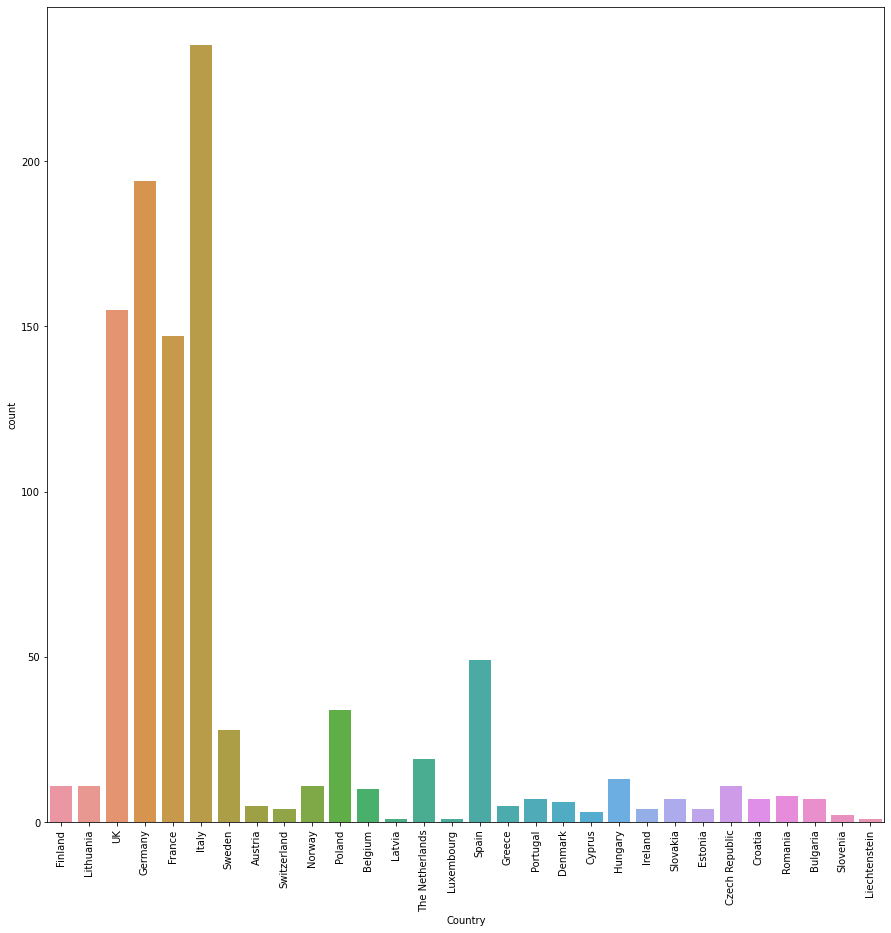

In [55]:
plt.figure(figsize=(15,15))
sns.countplot(x = df["Country"])
plt.xticks(rotation = 90)
plt.show()

**It is visible that most of the companies from Italy are growing fast.**

In [56]:
df['Sector'].value_counts()

Technology                      209
Construction                     89
Retail                           86
Ecommerce                        65
Support Services                 56
Health                           43
Energy                           42
Industrial Goods                 36
Advertising                      33
Transport                        28
Financial Services               28
Property                         26
Automobiles                      26
Fintech                          26
Management Consulting            22
Food & Beverage                  20
Telecoms                         20
Education                        15
Interiors                        12
Waste management & recycling     12
Media                            11
Fashion                          10
Personal & Household Goods       10
Sales & Marketing                10
Cyber Security                   10
Chemicals & Pharmaceuticals       8
Agricultural Commodities          7
Travel & Leisure            

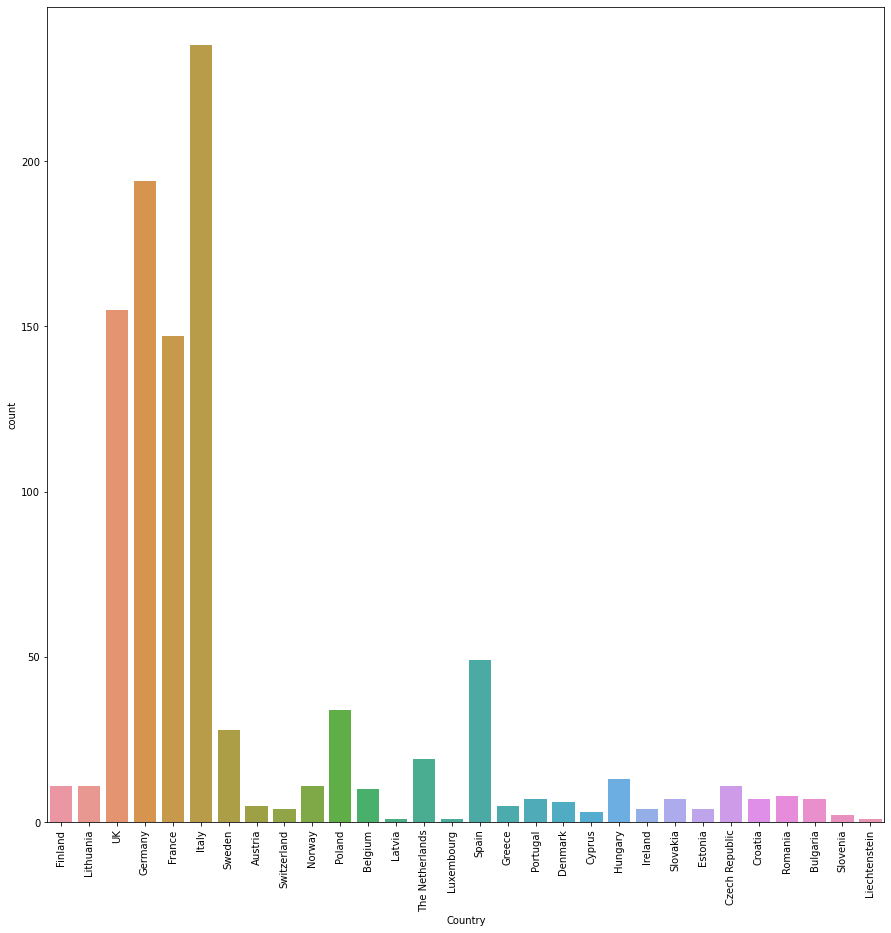

In [57]:
plt.figure(figsize=(15,15))
sns.countplot(x = df["Country"])
plt.xticks(rotation = 90)
plt.show()

**Technology leads on the list, followed by construction and retail while battery sector is legging behind in this list.**

#### Adding Two more colums 
###### rev_diff : difference between revenue of 2020 and 2017
###### emp_dsiff :difference between the number of employees of 2020 and 2017

In [58]:
df['rev_diff'] = df['Revenue2020'].sub(df['Revenue2017'], axis = 0)
df['emp_diff'] = df['employees2020'].sub(df['employees2017'], axis = 0)


In [59]:
df

Rank            Name ranking2021 ranking2020    Country  \
0       1         Swappie          No          No    Finland   
1       2     Kilo Health          No          No  Lithuania   
2       3             OCI          No          No         UK   
3       4        OnlyFans          No          No         UK   
4       5           Enpal          No          No    Germany   
..    ...             ...         ...         ...        ...   
995   996  peopleForecast          No          No    Germany   
996   997       Digitalpa          No          No      Italy   
997   998    Faktenkontor          No          No    Germany   
998   999          CLAREO         Yes         Yes     France   
999  1000      Laca Trade         Yes         Yes      Italy   

                    Sector       AGR    CAGR  Revenue2020  Revenue2017  \
0               Technology  19152.82  477.43   97611814.0     507000.0   
1                   Health  16541.73  450.05   57318766.0     344428.0   
2       Financial Services  13133.13  409.59  568322073.0    4325512.0   
3               Technology  11928.05  393.63  316732986.0    2652185.0   
4                   Energy  11441.27  386.88   56109613.0     486165.0   
..                     ...       ...     ...          ...          ...   
995             Technology    154.86   36.59    2086411.0     818658.0   
996  Management Consulting    154.82   36.59    1731340.0     679440.0   
997            Advertising    154.81   36.59   30967000.0   12153143.0   
998                 Retail    154.80   36.58   18854708.0    7399729.0   
999               Property    154.60   36.55   24741510.0    9717860.0   

     employees2020  employees2017  FoundingYear rankcompare     rev_diff  \
0            218.0            1.0          2016          No   97104814.0   
1            177.0           10.0          2013          No   56974338.0   
2             32.0            4.0          2012          No  563996561.0   
3            800.0            4.0          2016          No  314080801.0   
4            365.0            9.0          2017          No   55623448.0   
..             ...            ...           ...         ...          ...   
995           45.0           15.0          2014          No    1267753.0   
996           12.0           41.0          2014          No    1051900.0   
997          150.0          100.0          2003          No   18813857.0   
998           53.0           13.0          2012         Yes   11454979.0   
999            5.0            5.0          2013         Yes   15023650.0   

     emp_diff  
0       217.0  
1       167.0  
2        28.0  
3       796.0  
4       356.0  
..        ...  
995      30.0  
996     -29.0  
997      50.0  
998      40.0  
999       0.0  

[1000 rows x 16 columns]

#### Top 10 companies that has highest revenue based on revenue of 2020

In [72]:
df.nlargest(10,'Revenue2020')['Name']

81                       Octopus Energy
2                                   OCI
437                          CD Projekt
519                       Moonpig Group
254                        jobandtalent
3                              OnlyFans
141                                Bolt
200                              Gousto
33     Logistics Capital Partners (LCP)
712                              Epassi
Name: Name, dtype: object

#### Top 10 companies that has highest revenue based on revenue of 2017

In [78]:
df.sort_values('Revenue2017', ascending=True)['Name'].head(10)

42                    Wolfram Chain*
41                    LGM IMMOBILIER
52                        ACTEAM ENR
71                         Scolution
45                     CheTariffa.it
8                         Winelivery
93                       Baroni Home
32     AIHR | Academy to Innovate HR
68                         AppFollow
114                          Homepal
Name: Name, dtype: object

#### Top 10 companies that has lowest revenue based on revenue of 2020 and 2017

In [84]:
df.sort_values('Revenue2020', ascending=False)['Name'].head(10)

81                       Octopus Energy
2                                   OCI
437                          CD Projekt
519                       Moonpig Group
254                        jobandtalent
3                              OnlyFans
141                                Bolt
200                              Gousto
33     Logistics Capital Partners (LCP)
712                              Epassi
Name: Name, dtype: object

In [147]:
df.nsmallest(10, 'Revenue2017')['Name']

42                    Wolfram Chain*
41                    LGM IMMOBILIER
52                        ACTEAM ENR
71                         Scolution
45                     CheTariffa.it
8                         Winelivery
93                       Baroni Home
32     AIHR | Academy to Innovate HR
68                         AppFollow
114                          Homepal
Name: Name, dtype: object

**It is visible that the companies which have highest or lowest revenue on 2017,their situation has changed and not seen in the same list on 2020**

#### Top 10 companies based on highest number of employee in 2020 and 2017

In [145]:
df.nlargest(10,'employees2020')['Name']

141                                    Bolt
828                               KBS Group
761                              Hyperoptic
437                              CD Projekt
450    Brighton & Hove Albion Football Club
178                           Nord Security
975                                Selectra
165             Learning Technologies Group
81                           Octopus Energy
721                                 Adrilog
Name: Name, dtype: object

In [146]:
df.nlargest(10,'employees2017')['Name']

165    Learning Technologies Group
437                     CD Projekt
828                      KBS Group
721                        Adrilog
975                       Selectra
986                        Izertis
911                        EKINOPS
761                     Hyperoptic
141                           Bolt
178                  Nord Security
Name: Name, dtype: object

#### Top 10 companies based on lowest number of employee in 2020 and 2017

In [148]:
df.nsmallest(10, 'employees2020')['Name']

199    Lyonnaise de Construction et Renovation
365                               Labevolution
792                             Spedition Ibov
891                                   Accolade
24                              Euro Top Brand
54                                 Azure Prism
137                                AER TRADING
196                      Bug Bite Thing Europe
970                                    Riotloc
39                                 H.K.Trading
Name: Name, dtype: object

In [150]:
df.nsmallest(10, 'employees2017')['Name']

41                              LGM IMMOBILIER
51                     Active Energy Solutions
80                         ISO Public Services
199    Lyonnaise de Construction et Renovation
439                                 Tooltester
792                             Spedition Ibov
853             LUXURY & PERFORMANCE SELECTION
891                                   Accolade
0                                      Swappie
8                                   Winelivery
Name: Name, dtype: object

In [152]:
(df['emp_diff'] < 0).sum()

13

**There are 13 companies who has less employess in 2020 than 2017.**

##### Within each country the grouping take place based on "Sectors"

In [143]:
df.groupby(['Country'])['Sector'].value_counts().head(50)

Country         Sector                      
Austria         Ecommerce                        1
                Education                        1
                Food & Beverage                  1
                Technology                       1
                Waste management & recycling     1
Belgium         Technology                       6
                Ecommerce                        2
                Cyber Security                   1
                Fintech                          1
Bulgaria        Technology                       3
                Energy                           1
                Retail                           1
                Sales & Marketing                1
                Transport                        1
Croatia         Technology                       3
                Retail                           2
                Advertising                      1
                Construction                     1
Cyprus          Advertising          

## Visualization

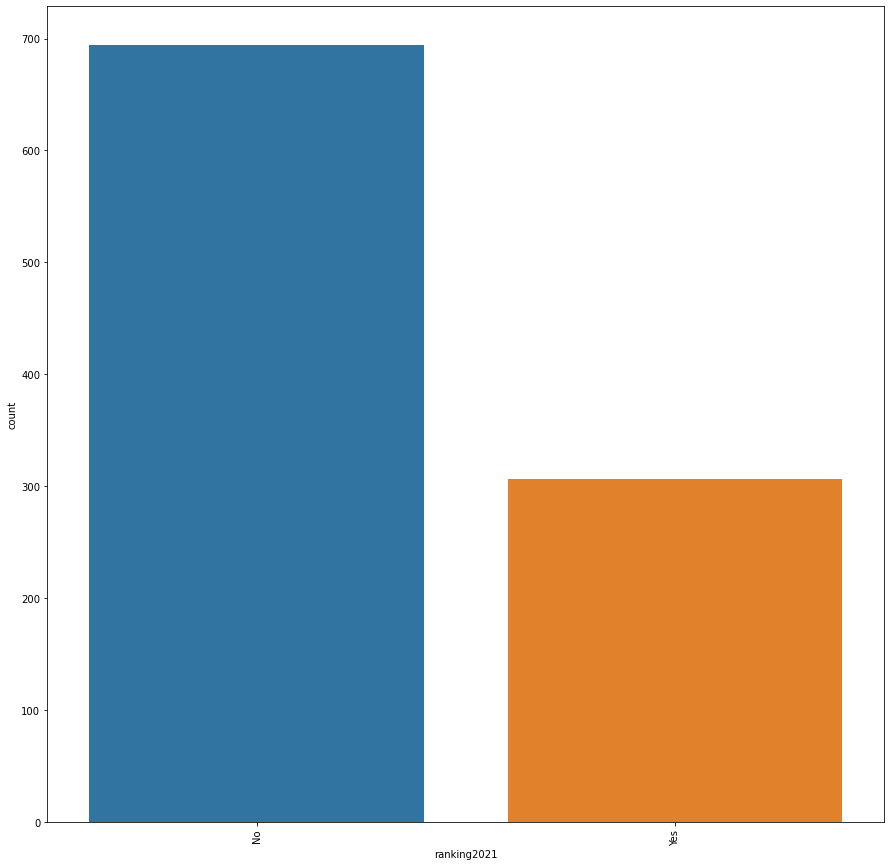

In [46]:
plt.figure(figsize=(15,15))
sns.countplot(x = df["ranking2021"])
plt.xticks(rotation = 90)
plt.show()

**The graph shows, there are 306 companies that also appeared in the previous edition which indicates the stability in their growth curves.**


##### visualization of the chnage  of the revenue of all companies from 2020 to 2017

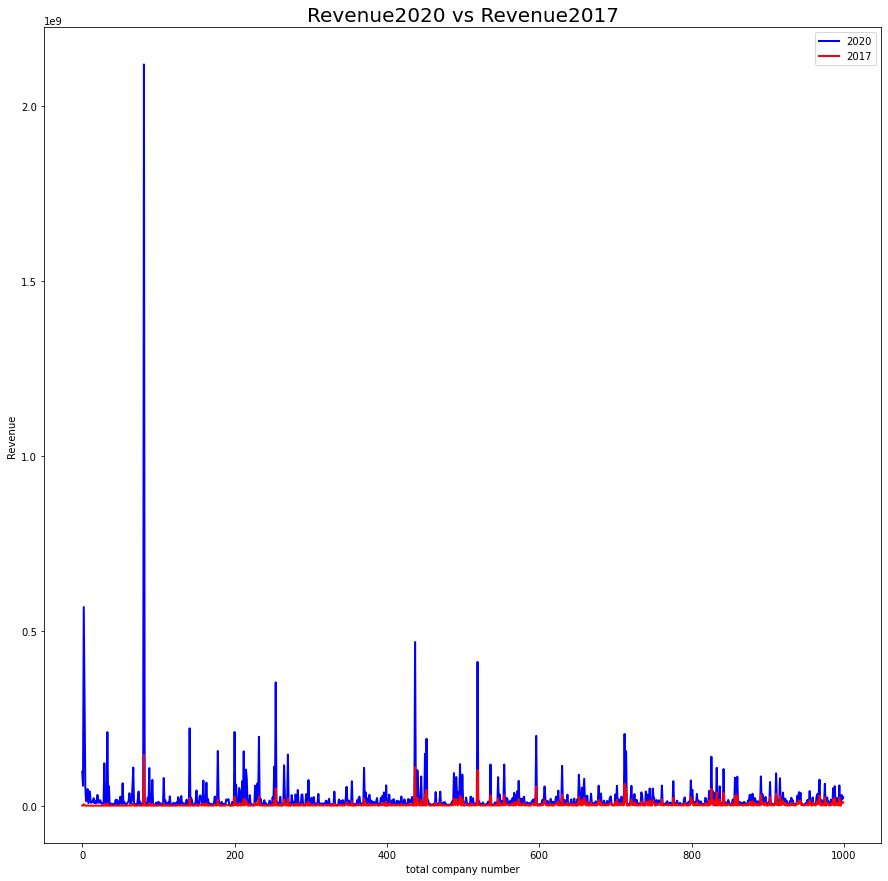

In [91]:
plt.figure(figsize=(15,15))
sns.lineplot(data = df["Revenue2020"],linewidth =2, label =2020, color='blue')
sns.lineplot(data = df["Revenue2017"],linewidth =2, label =2017, color='red')
plt.title('Revenue2020 vs Revenue2017' ,fontsize = 20)
plt.ylabel("Revenue")
plt.xlabel("total company number")
plt.show()

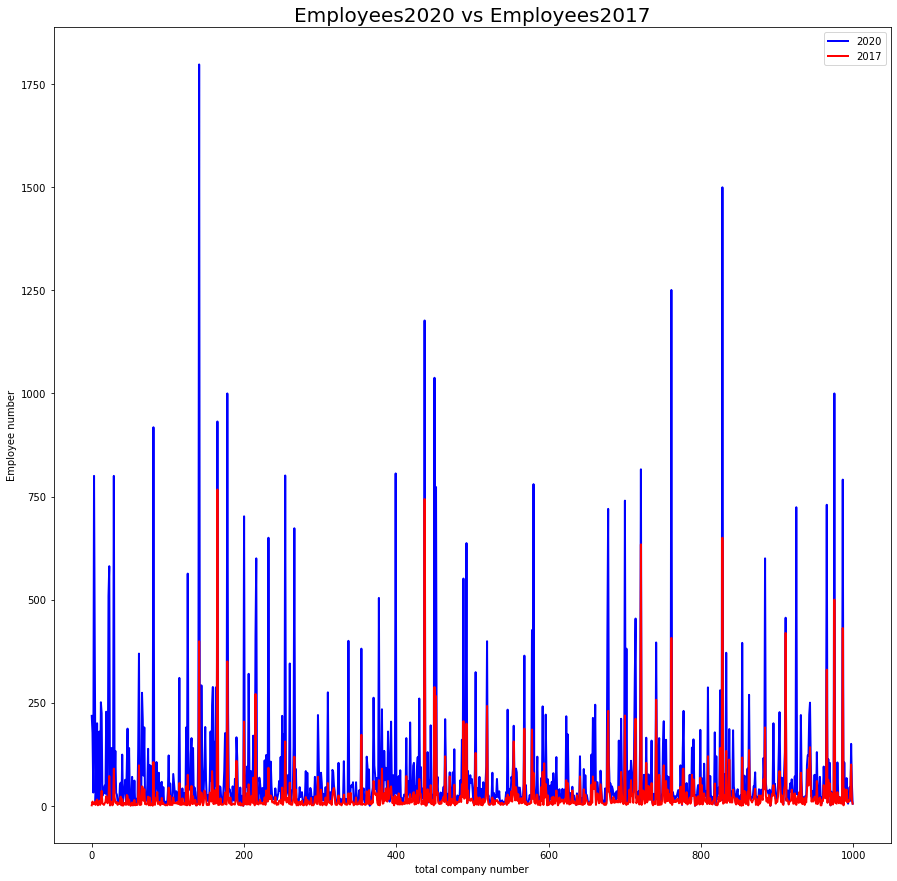

In [90]:
plt.figure(figsize=(15,15))
sns.lineplot(data = df["employees2020"],linewidth =2, label =2020, color='blue')
sns.lineplot(data = df["employees2017"],linewidth =2, label =2017, color='red')
plt.title('Employees2020 vs Employees2017' ,fontsize = 20)
plt.ylabel("Employee number")
plt.xlabel("total company number")
plt.show()

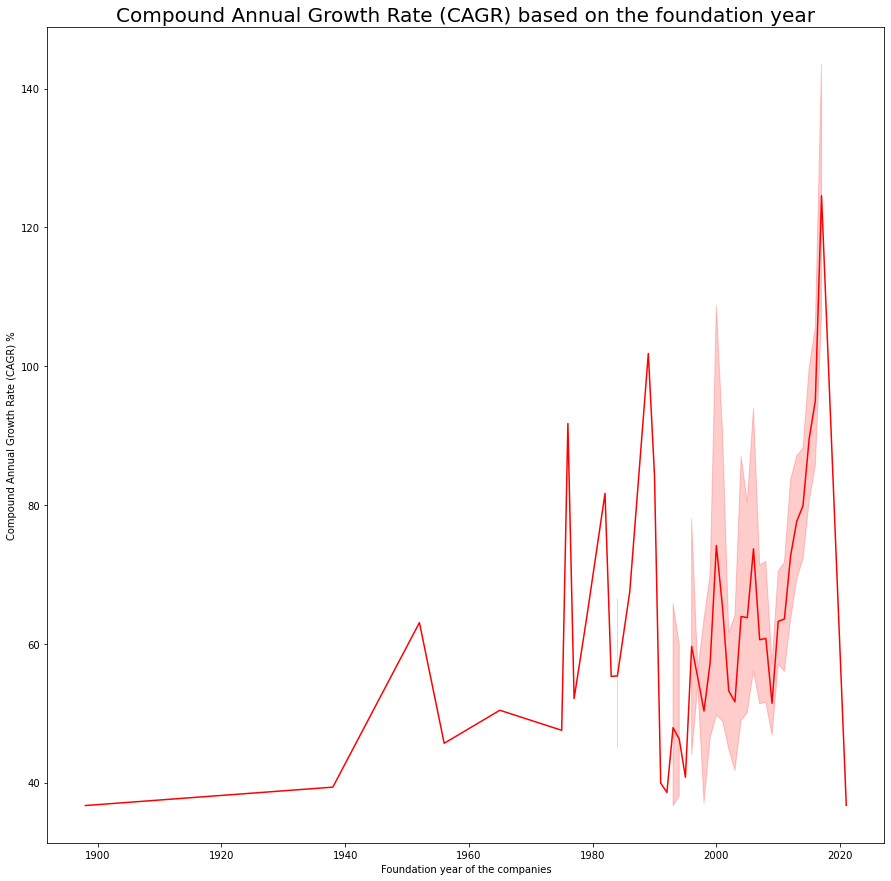

In [95]:
plt.figure(figsize=(15,15))
sns.lineplot(data = df, x='FoundingYear',y = 'CAGR', color= 'red', alpha=0.9)
plt.title(' Relation between Compound Annual Growth Rate (CAGR) and the foundation year' ,fontsize = 20)
plt.ylabel("Compound Annual Growth Rate (CAGR) %")
plt.xlabel("Foundation year of the companies")
plt.show()

**It is visible that the recent founded companies growth is faster compare to the old companies.**

<Figure size 1080x1080 with 0 Axes>

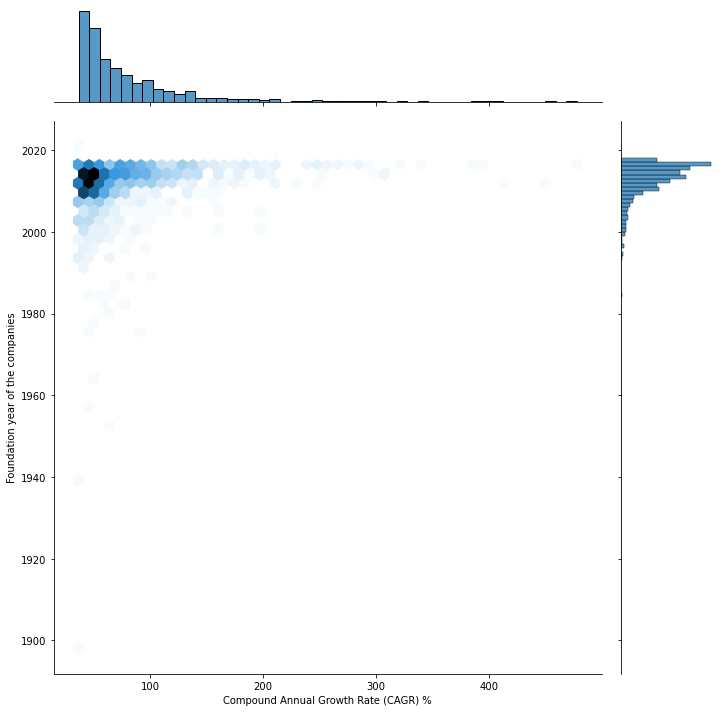

In [102]:
plt.figure(figsize=(15,15))
sns.jointplot(y='FoundingYear',x = 'CAGR',data = df,height = 10, kind = 'hex')
#plt.title('Compound Annual Growth Rate (CAGR) based on the foundation year' ,fontsize = 10)
plt.xlabel("Compound Annual Growth Rate (CAGR) %")
plt.ylabel("Foundation year of the companies")
plt.show()
#companies in the both side


A Jointplot comprises three plots. Out of the three, one plot displays a bivariate graph which shows how the dependent variable(Y) varies with the independent variable(X). Another plot is placed horizontally at the top of the bivariate graph and it shows the distribution of the independent variable(X).

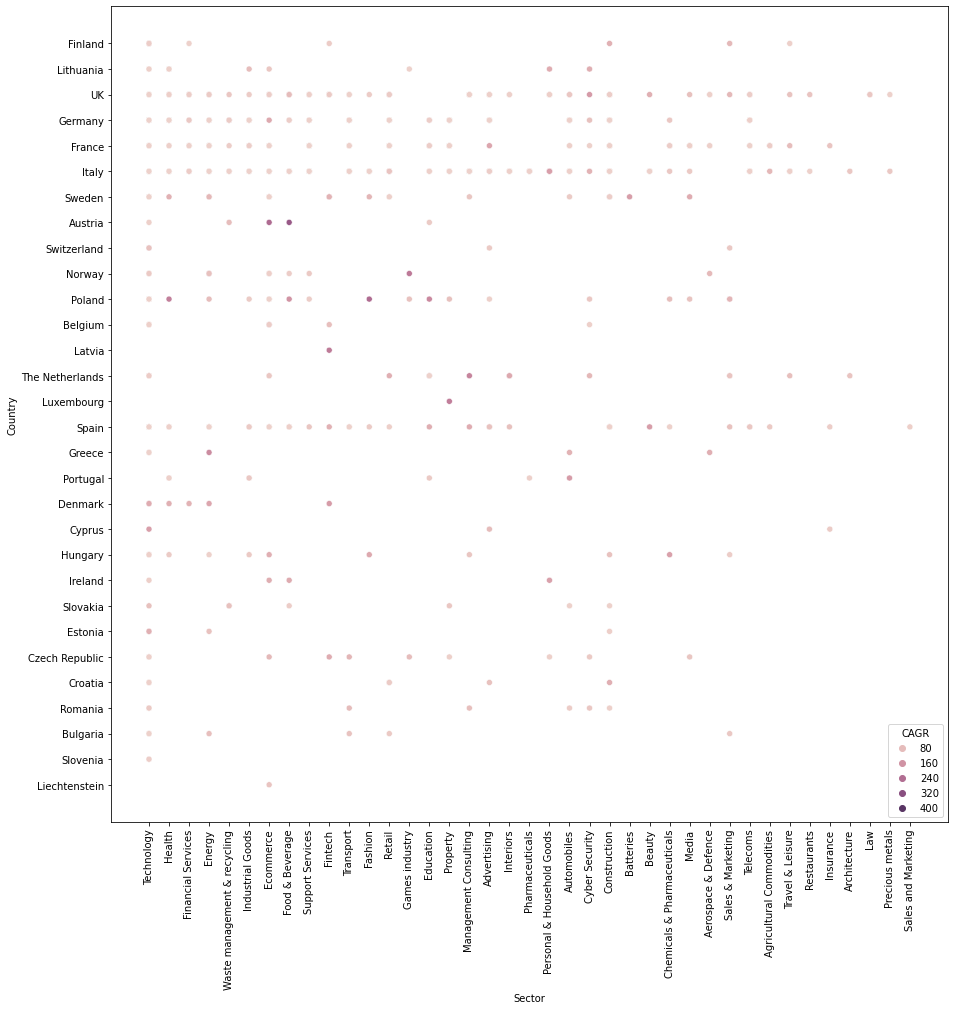

In [104]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='Sector',y = 'Country',data = df, hue = 'CAGR')
plt.xticks(rotation=90)
plt.show()

**Like other analysis, here it is visible that tech sector of almost every country is progressing rapidly than the other sectors.**

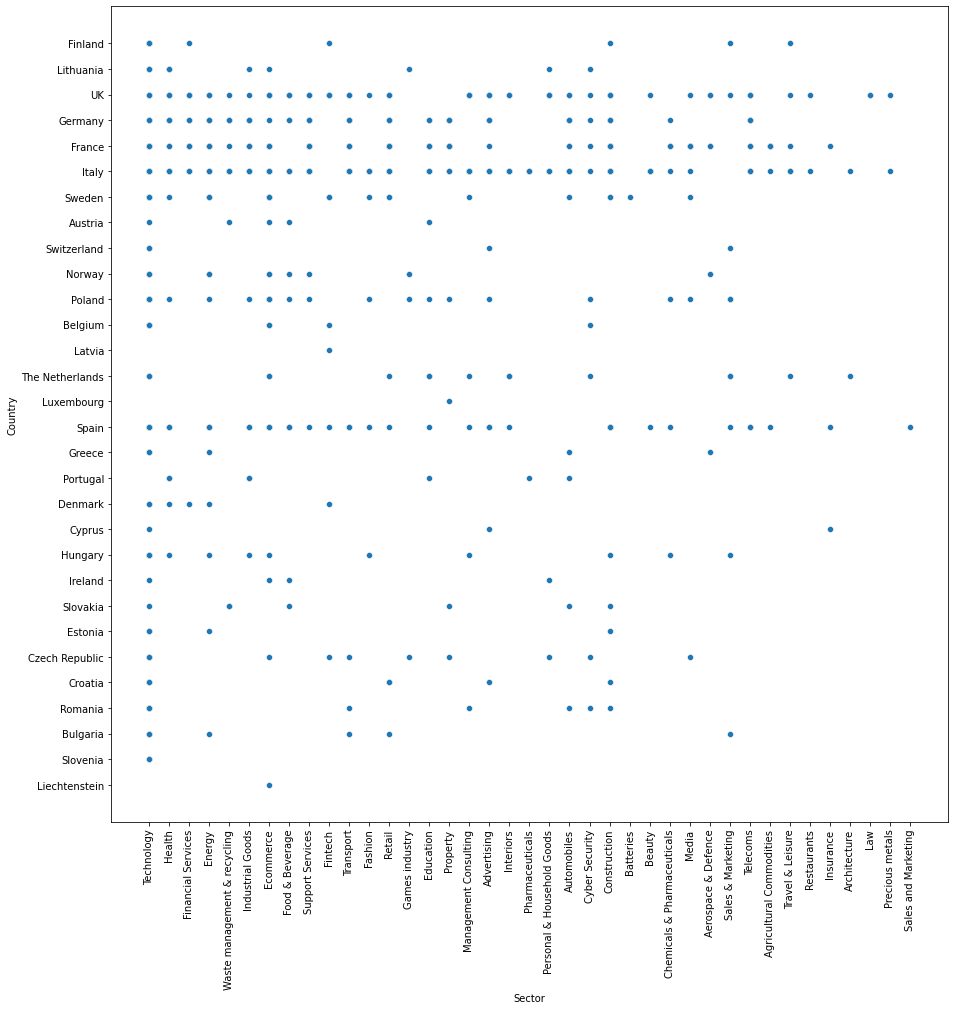

In [106]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='Sector',y = 'Country',data = df, palette="deep")
plt.xticks(rotation=90)
plt.show()

##### revenue distribution relative to countirs for 2020 and 2017

A histogram graphically shows how frequently every value in a data set occurs in a relatively unbiased way. Histograms make it easy to see which values are most common and which values are least common.

In [112]:
px.histogram(df,x ='Country', y = 'Revenue2020', marginal = 'box', hover_data =df.columns)

There are several outliners.

In [116]:
px.histogram(df,x ='Country', y = 'Revenue2017', marginal = 'box', hover_data =df.columns, color ='Country')

##### Revenue for the sectors in 2020 and 2017

In [117]:
px.histogram(df,x ='Sector', y = 'Revenue2020', marginal = 'box', hover_data =df.columns, color='Sector', width = 1000)

In [118]:
px.histogram(df,x ='Sector', y = 'Revenue2017', marginal = 'box', hover_data =df.columns, color='Sector', width=1000)

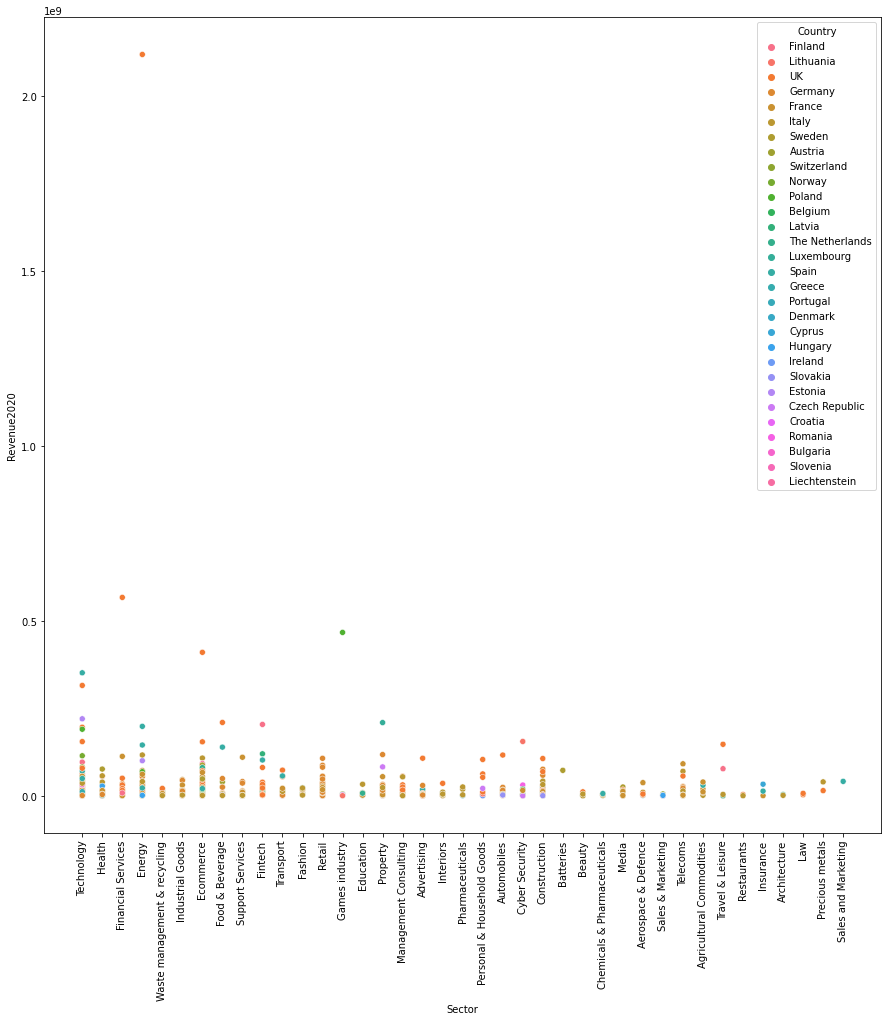

In [119]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='Sector',y = 'Revenue2020',data = df, hue = 'Country')
plt.xticks(rotation=90)
plt.show()

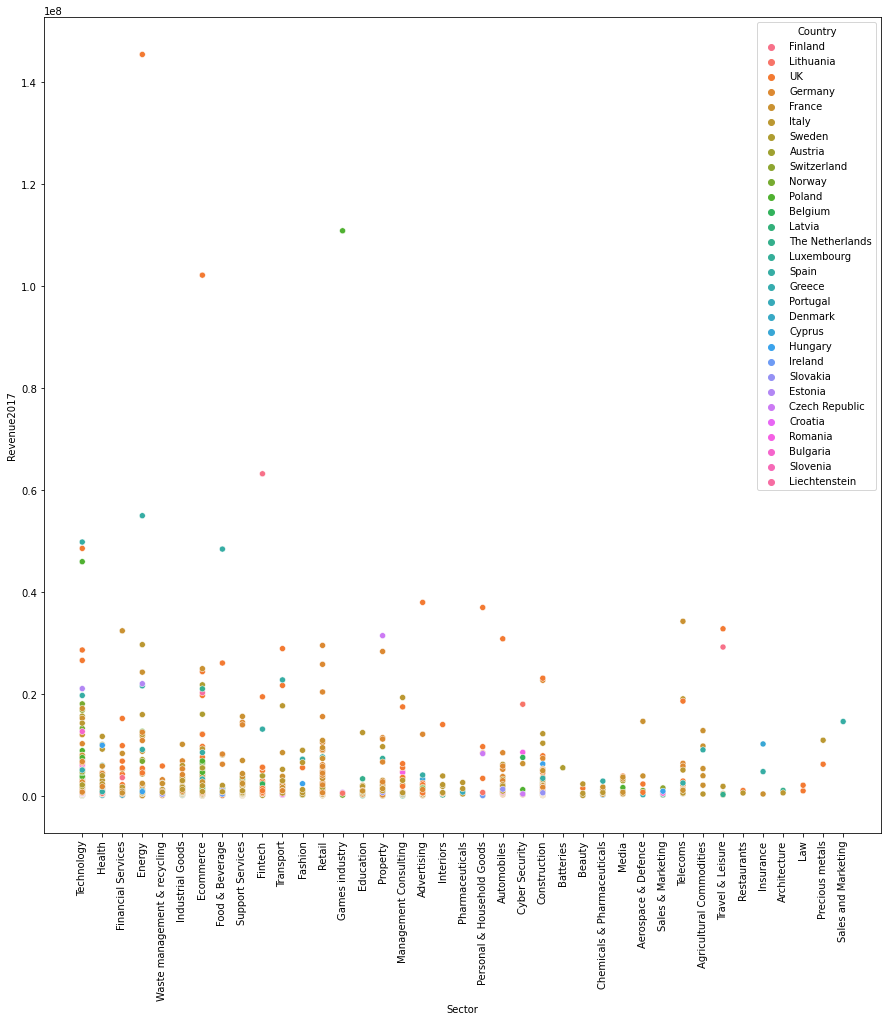

In [120]:
plt.figure(figsize=(15,15))
sns.scatterplot(x='Sector',y = 'Revenue2017',data = df, hue = 'Country')
plt.xticks(rotation=90)
plt.show()

###### A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

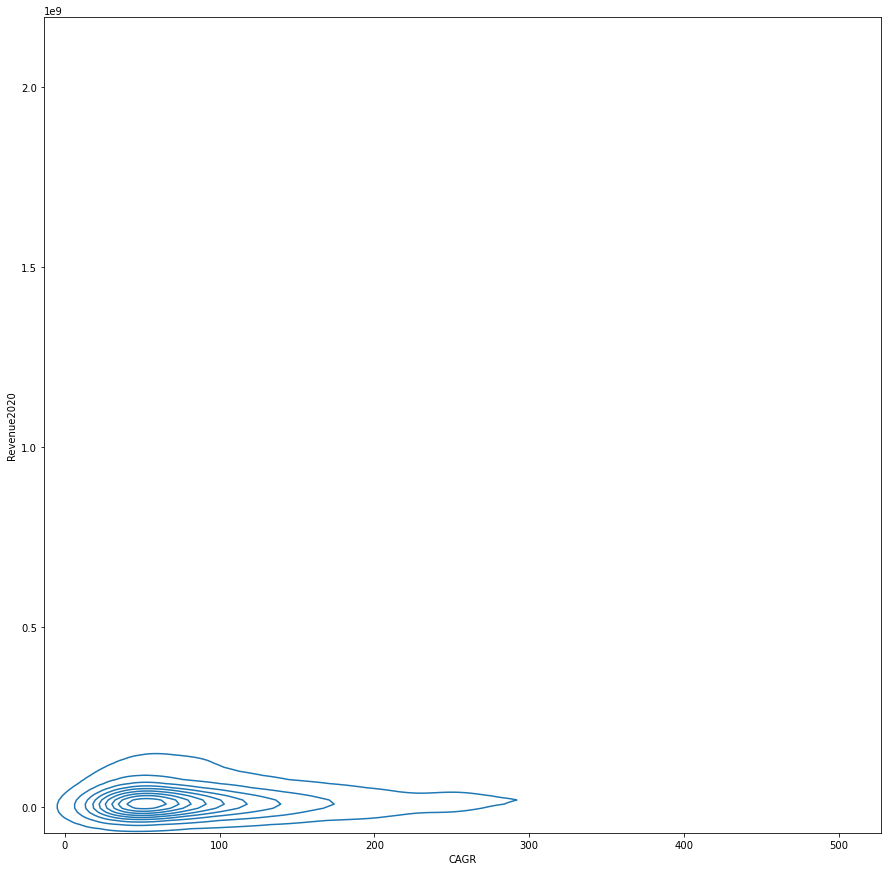

In [134]:
plt.figure(figsize=(15,15))
sns.kdeplot(data =df, x ='CAGR',y='Revenue2020')

plt.show()

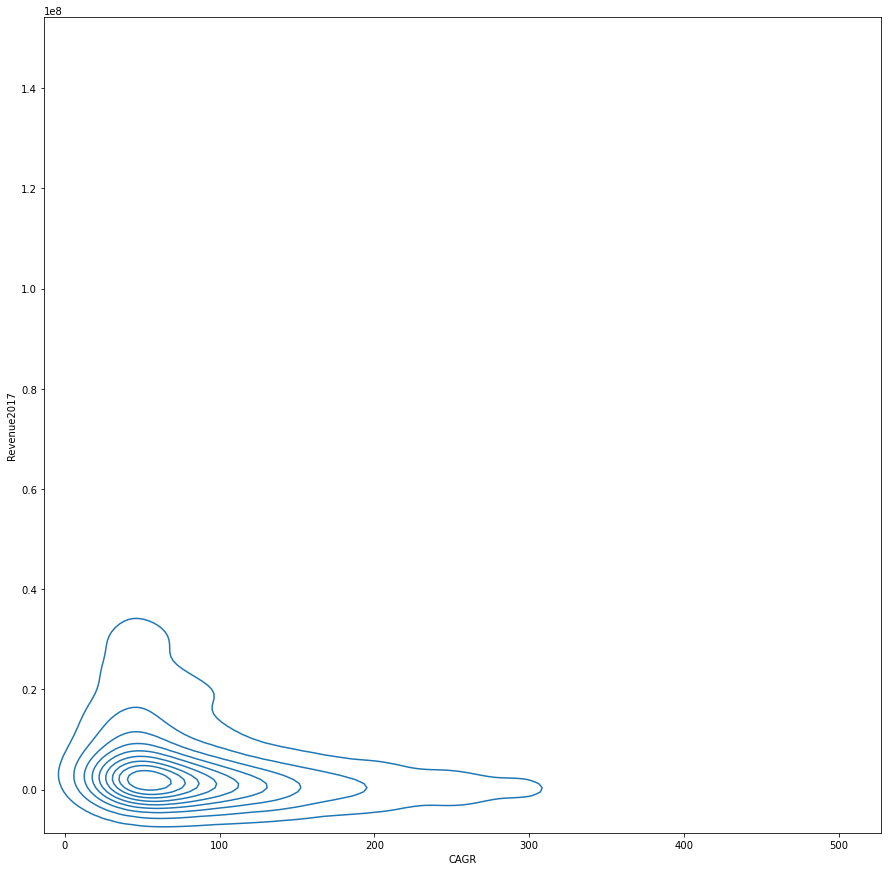

In [135]:
plt.figure(figsize=(15,15))
sns.kdeplot(data =df, x ='CAGR',y='Revenue2017')

plt.show()

In [138]:
px.box(df, x='Sector', y= 'employees2020', color='Sector', width=1000)

In [139]:
px.box(df, x='Sector', y= 'employees2017', color='Sector', width=1000)